In [91]:
import requests
import json as js
import re
import pandas as pd
from bs4 import BeautifulSoup
url = "https://decarocalzature.com/"
url_prodotti = url+"tag-prodotto/de-caro/"
url_prodotto = url+"prodotto/"
uri_page= "page/"
#price_product = "<span class=woocommerce-Price-amount amount><bdi><span class=woocommerce-Price-currencySymbol>€</span>26,90</bdi></span>
title_list = list()
price_list = list()
categorys = set()
categorys_list = list()
dict = {"modello": [], "categoria": [], "prezzo": []}
for page in range(2,27):
    if(page==1):
        url_for = url_prodotti
    else:
        url_for = url_prodotti+uri_page+str(page)+"/"
    soup = BeautifulSoup(requests.get(url_for).text)
    product_scraped = soup.find_all("a", attrs={"class": "woocommerce-LoopProduct-link woocommerce-loop-product__link"})
    for product in product_scraped:
        title = product.find("h2", attrs={"class": "woocommerce-loop-product__title"}) 
        title_str = title.text.strip()
        title_list.append(title_str)
        category = title_str.strip().split(" ")[0]
        categorys.add(category)
        categorys_list.append(category)
        price = product.find("bdi")
        price_str = price.text.strip().replace(",",".").replace("€","")
        price_list.append(price_str)
for modello, category, prezzo in zip(title_list,categorys_list,price_list):
    dict["categoria"].append(category)
    dict["modello"].append(modello)
    dict["prezzo"].append(prezzo)
            
DeCaro = pd.DataFrame(dict)
DeCaro["sottocategorie"] = DeCaro.categoria

#POCHETTE Borsa ZAINO Zainetto
category_right = ['Pochette', 'Borsa', 'Zainetto','Zaino']
DeCaro = DeCaro[~DeCaro.categoria.isin(category_right)]

#SCARPE BASSE (Mocassini, Ballerine,Francesine)
DeCaro.categoria = DeCaro.categoria.str.replace("Mocassini","Scarpe basse").replace("Ballerine","Scarpe basse")
#Stivali e stivaletti (Stivaletti,Stivali,Anfibi,Francesine,Sabot,Tronchetti,Tronchetti,Bikers)
DeCaro.categoria = DeCaro.categoria.str.replace("Stivaletti","Stivali e stivaletti").replace("Stivali","Stivali e stivaletti").replace("Anfibi","Stivali e stivaletti")
DeCaro.categoria = DeCaro.categoria.str.replace("Francesine","Stivali e stivaletti").replace("Sabot","Stivali e stivaletti").replace("Tronchetto","Stivali e stivaletti")
DeCaro.categoria = DeCaro.categoria.str.replace("Tronchetti","Stivali e stivaletti").replace("Bikers","Stivali e stivaletti")
#Stivali e stivaletti (Ciabatte,Ciabattine)
DeCaro.categoria = DeCaro.categoria.str.replace("Ciabatte","Ciabatte").replace("Ciabattine","Ciabatte")

DeCaro

,modello,categoria,prezzo,sottocategorie
0,Sandali bassi Digue gladiatore fasciati con bo...,Sandali,14.90,Sandali
1,Sandali bassi Margherita vera pelle infradito ...,Sandali,45.90,Sandali
2,Sandali Antigua con zeppa alta spuntatine slin...,Sandali,45.90,Sandali
3,Sandali bassi Barth con zeppa comoda giornaliera,Sandali,24.90,Sandali
4,Sneakers Mandy con zeppa platform e fermagli s...,Sneakers,23.90,Sneakers
...,...,...,...,...
395,Anfibi Tod vera pelle stivali con tacco carrar...,Stivali e stivaletti,84.90,Anfibi
396,Stivali Why alti a tubo VERA PELLE con zeppa i...,Stivali e stivaletti,89.90,Stivali
397,Stivali Nepal beatles vera pelle tacco carrarm...,Stivali e stivaletti,89.90,Stivali
398,Ciabatte Amalfi vera pelle sandali bassi con f...,Ciabatte,29.90,Ciabatte


In [92]:
#['Sneakers' 'Sandali bassi' 'Stivali e stivaletti' 'Zeppe'
#'Sandali con tacco' 'Scarpe  con tacco(Decollete)'
#'Scarpe basse(ballerine, mocassini)']

print(len(DeCaro.categoria.unique()))
print(DeCaro.categoria.unique())
print(len(DeCaro.sottocategorie.unique()))
print(DeCaro.sottocategorie.unique())

DeCaro



7
['Sandali' 'Sneakers' 'Décolleté' 'Scarpe basse' 'Stivali e stivaletti'
 'Ciabatte' 'Zeppe']
16
['Sandali' 'Sneakers' 'Décolleté' 'Mocassini' 'Stivaletti' 'Stivali'
 'Ballerine' 'Anfibi' 'Tronchetti' 'Bikers' 'Tronchetto' 'Francesine'
 'Ciabatte' 'Zeppe' 'Ciabattine' 'Sabot']


,modello,categoria,prezzo,sottocategorie
0,Sandali bassi Digue gladiatore fasciati con bo...,Sandali,14.90,Sandali
1,Sandali bassi Margherita vera pelle infradito ...,Sandali,45.90,Sandali
2,Sandali Antigua con zeppa alta spuntatine slin...,Sandali,45.90,Sandali
3,Sandali bassi Barth con zeppa comoda giornaliera,Sandali,24.90,Sandali
4,Sneakers Mandy con zeppa platform e fermagli s...,Sneakers,23.90,Sneakers
...,...,...,...,...
395,Anfibi Tod vera pelle stivali con tacco carrar...,Stivali e stivaletti,84.90,Anfibi
396,Stivali Why alti a tubo VERA PELLE con zeppa i...,Stivali e stivaletti,89.90,Stivali
397,Stivali Nepal beatles vera pelle tacco carrarm...,Stivali e stivaletti,89.90,Stivali
398,Ciabatte Amalfi vera pelle sandali bassi con f...,Ciabatte,29.90,Ciabatte


In [93]:
DeCaro.prezzo = DeCaro.prezzo.astype(float)
DeCaro

,modello,categoria,prezzo,sottocategorie
0,Sandali bassi Digue gladiatore fasciati con bo...,Sandali,14.9,Sandali
1,Sandali bassi Margherita vera pelle infradito ...,Sandali,45.9,Sandali
2,Sandali Antigua con zeppa alta spuntatine slin...,Sandali,45.9,Sandali
3,Sandali bassi Barth con zeppa comoda giornaliera,Sandali,24.9,Sandali
4,Sneakers Mandy con zeppa platform e fermagli s...,Sneakers,23.9,Sneakers
...,...,...,...,...
395,Anfibi Tod vera pelle stivali con tacco carrar...,Stivali e stivaletti,84.9,Anfibi
396,Stivali Why alti a tubo VERA PELLE con zeppa i...,Stivali e stivaletti,89.9,Stivali
397,Stivali Nepal beatles vera pelle tacco carrarm...,Stivali e stivaletti,89.9,Stivali
398,Ciabatte Amalfi vera pelle sandali bassi con f...,Ciabatte,29.9,Ciabatte


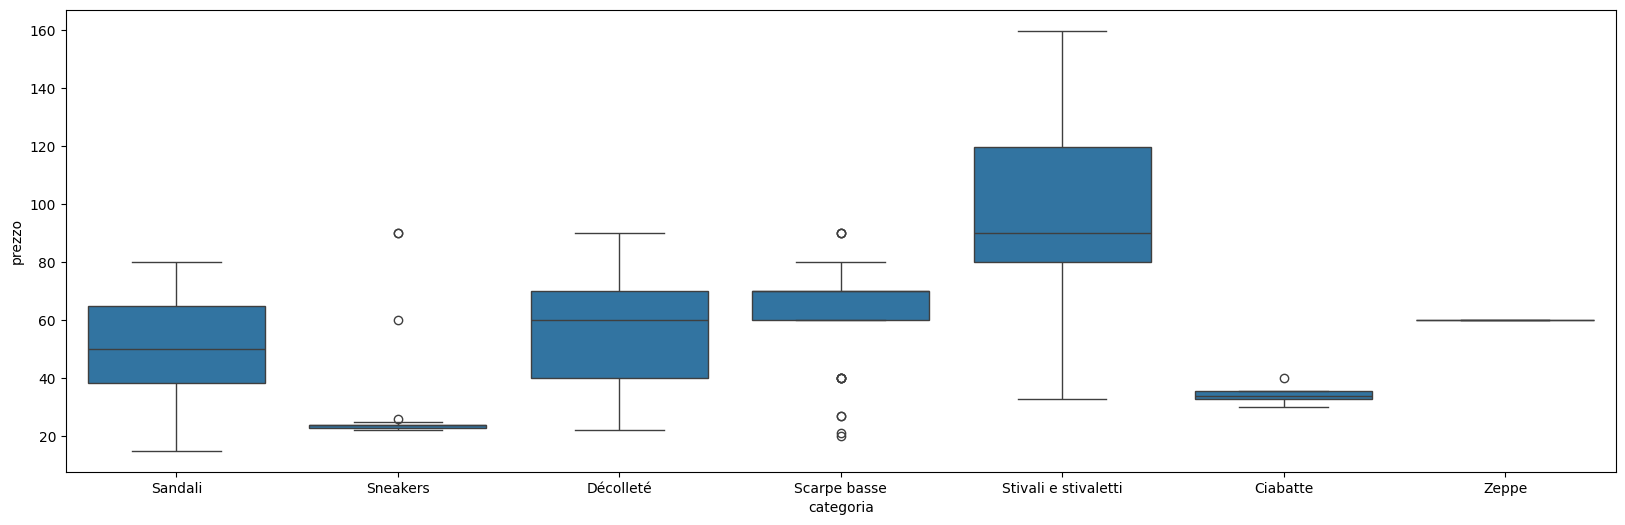

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
sns.boxplot(x="categoria", y="prezzo", data=DeCaro)
plt.show()

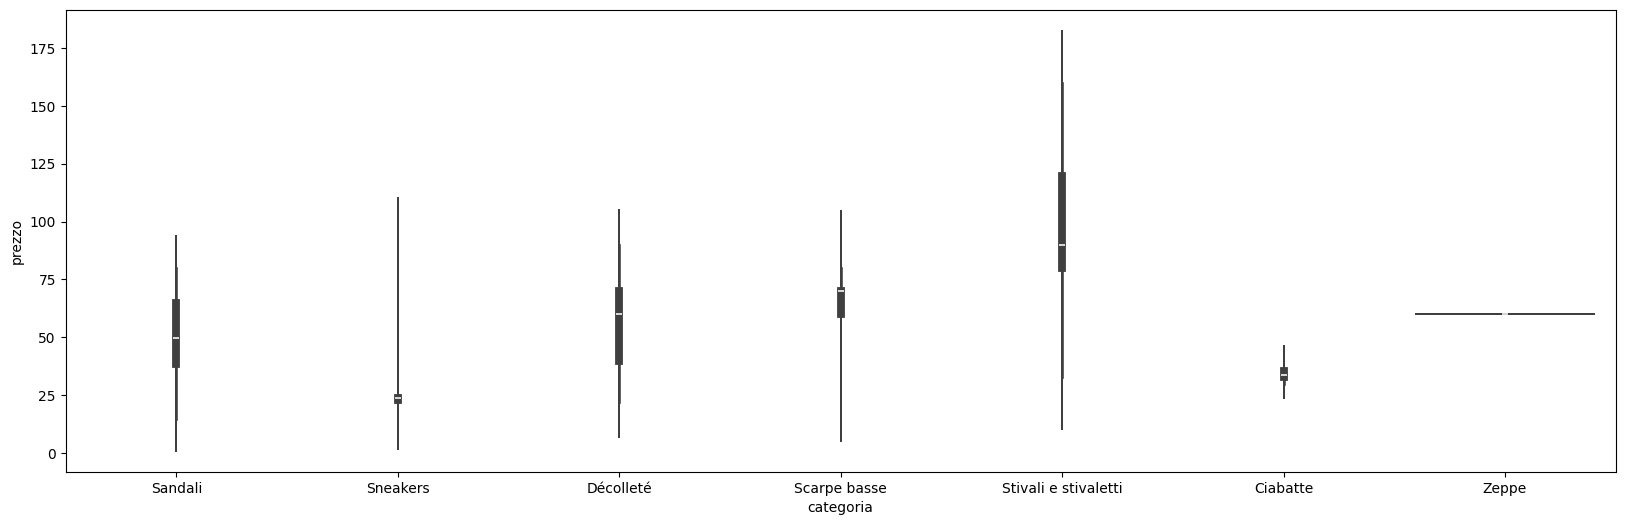

In [95]:
plt.figure(figsize=(20, 6))
sns.violinplot(x="categoria", y="prezzo", data=DeCaro)
plt.show()

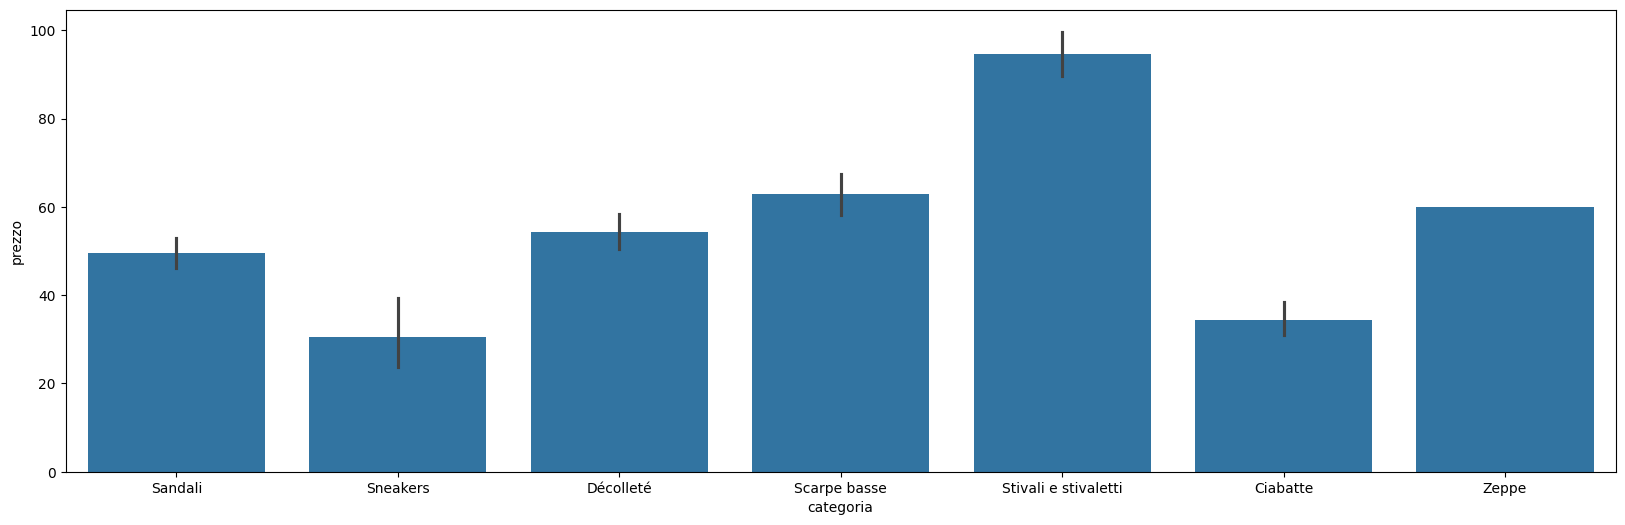

In [96]:
plt.figure(figsize=(20, 6))
sns.barplot(x="categoria", y="prezzo", data = DeCaro)
plt.show()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Stivali e stivaletti'),
  Text(1, 0, 'Sandali'),
  Text(2, 0, 'Décolleté'),
  Text(3, 0, 'Scarpe basse'),
  Text(4, 0, 'Sneakers'),
  Text(5, 0, 'Ciabatte'),
  Text(6, 0, 'Zeppe')])

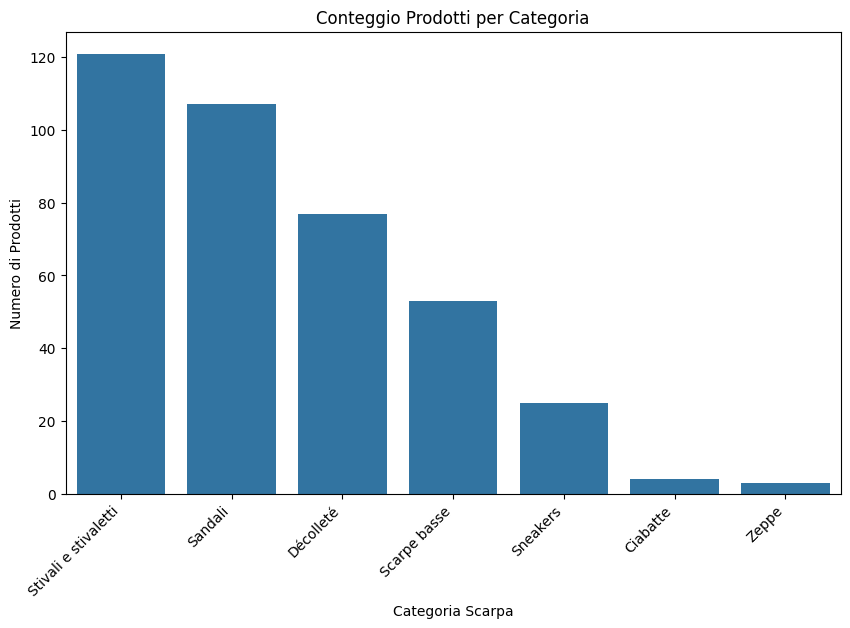

In [97]:
prodotti_per_categoria = DeCaro['categoria'].value_counts()
plt.figure(figsize=(10, 6)) 
sns.barplot(x=prodotti_per_categoria.index, y=prodotti_per_categoria.values)
plt.xlabel('Categoria Scarpa')
plt.ylabel('Numero di Prodotti')
plt.title('Conteggio Prodotti per Categoria')
plt.xticks(rotation=45, ha='right')

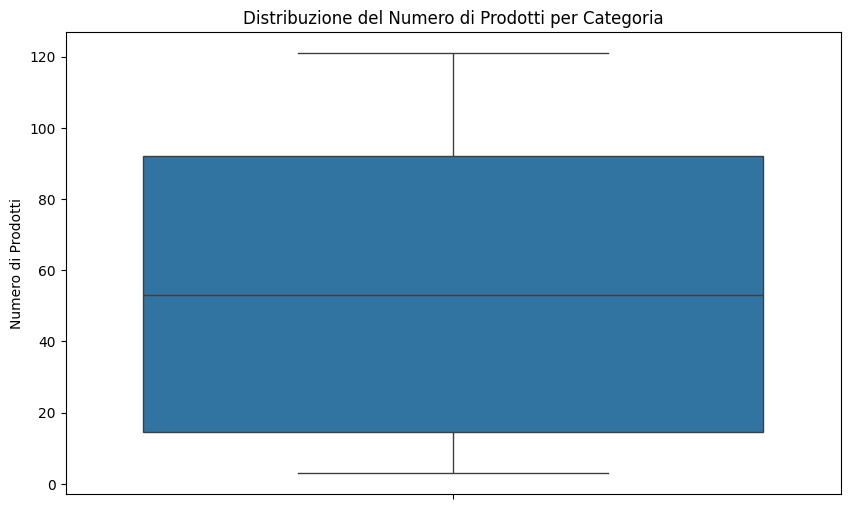

In [98]:
prodotti_per_categoria = DeCaro['categoria'].value_counts()
plt.figure(figsize=(10, 6))  
sns.boxplot(y=prodotti_per_categoria.values)
plt.ylabel('Numero di Prodotti')
plt.title('Distribuzione del Numero di Prodotti per Categoria')
plt.show()

In [99]:
gruppo_tipologia = DeCaro.groupby('categoria')
statistiche_prezzo = gruppo_tipologia['prezzo'].describe()
statistiche_prezzo

,count,mean,std,min,25%,50%,75%,max
categoria,,,,,,,,
Ciabatte,4.0,34.400000,4.123106,29.9,32.9,33.9,35.4,39.9
Décolleté,77.0,54.341558,18.013514,21.9,39.9,59.9,69.9,89.9
Sandali,107.0,49.572897,17.692220,14.9,38.4,49.9,64.9,79.9
Scarpe basse,53.0,63.013208,16.458176,19.9,59.9,69.9,69.9,89.9
Sneakers,25.0,30.420000,19.322094,21.9,22.9,23.9,23.9,89.9
Stivali e stivaletti,121.0,94.594215,29.415654,32.9,79.9,89.9,119.9,159.9
Zeppe,3.0,59.900000,0.000000,59.9,59.9,59.9,59.9,59.9


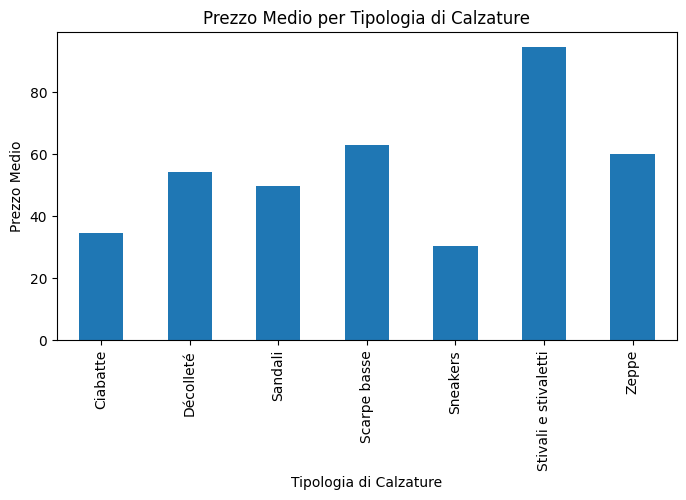

                      count       mean        std   min   25%   50%    75%  \
categoria                                                                    
Ciabatte                4.0  34.400000   4.123106  29.9  32.9  33.9   35.4   
Décolleté              77.0  54.341558  18.013514  21.9  39.9  59.9   69.9   
Sandali               107.0  49.572897  17.692220  14.9  38.4  49.9   64.9   
Scarpe basse           53.0  63.013208  16.458176  19.9  59.9  69.9   69.9   
Sneakers               25.0  30.420000  19.322094  21.9  22.9  23.9   23.9   
Stivali e stivaletti  121.0  94.594215  29.415654  32.9  79.9  89.9  119.9   
Zeppe                   3.0  59.900000   0.000000  59.9  59.9  59.9   59.9   

                        max  
categoria                    
Ciabatte               39.9  
Décolleté              89.9  
Sandali                79.9  
Scarpe basse           89.9  
Sneakers               89.9  
Stivali e stivaletti  159.9  
Zeppe                  59.9  


In [100]:
statistiche_prezzo['mean'].plot(kind='bar', figsize=(8, 4))
plt.xlabel('Tipologia di Calzature')
plt.ylabel('Prezzo Medio')
plt.title('Prezzo Medio per Tipologia di Calzature')
plt.show()
print(statistiche_prezzo)

                      mean   min    max
sottocategorie                         
Anfibi           93.081818  49.9  119.9
Ballerine        53.636842  19.9   79.9
Bikers          119.900000  89.9  149.9
Ciabatte         32.566667  29.9   33.9
Ciabattine       39.900000  39.9   39.9
Décolleté        54.341558  21.9   89.9
Francesine       89.900000  89.9   89.9
Mocassini        68.252941  26.9   89.9
Sabot            69.900000  69.9   69.9
Sandali          49.572897  14.9   79.9
Sneakers         30.420000  21.9   89.9
Stivaletti       70.488235  32.9  119.9
Stivali         103.001695  33.9  159.9
Tronchetti       91.233333  79.9  119.9
Tronchetto       91.900000  69.9  129.9
Zeppe            59.900000  59.9   59.9


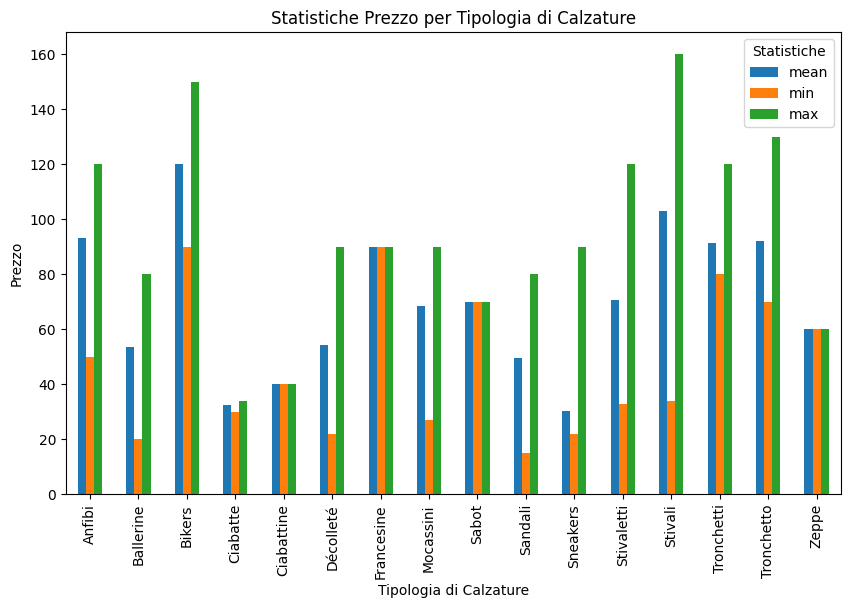

In [123]:
gruppo_categoria = DeCaro.groupby('sottocategorie')
statistiche_prezzo = gruppo_categoria['prezzo'].agg(['mean', 'min', 'max'])
print(statistiche_prezzo)
statistiche_prezzo.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Tipologia di Calzature')
plt.ylabel('Prezzo')
plt.title('Statistiche Prezzo per Tipologia di Calzature')
plt.legend(title='Statistiche')
plt.show()

                           mean   min    max
categoria                                   
Ciabatte              34.400000  29.9   39.9
Décolleté             54.341558  21.9   89.9
Sandali               49.572897  14.9   79.9
Scarpe basse          63.013208  19.9   89.9
Sneakers              30.420000  21.9   89.9
Stivali e stivaletti  94.594215  32.9  159.9
Zeppe                 59.900000  59.9   59.9


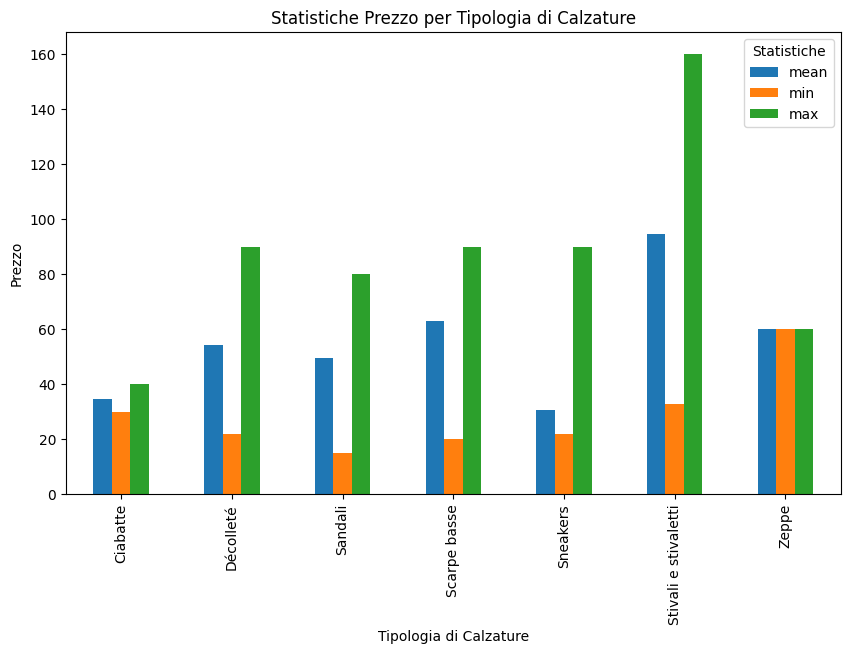

In [125]:
gruppo_categoria = DeCaro.groupby('categoria')
statistiche_prezzo = gruppo_categoria['prezzo'].agg(['mean', 'min', 'max'])
print(statistiche_prezzo)
statistiche_prezzo.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Tipologia di Calzature')
plt.ylabel('Prezzo')
plt.title('Statistiche Prezzo per Tipologia di Calzature')
plt.legend(title='Statistiche')
plt.show()

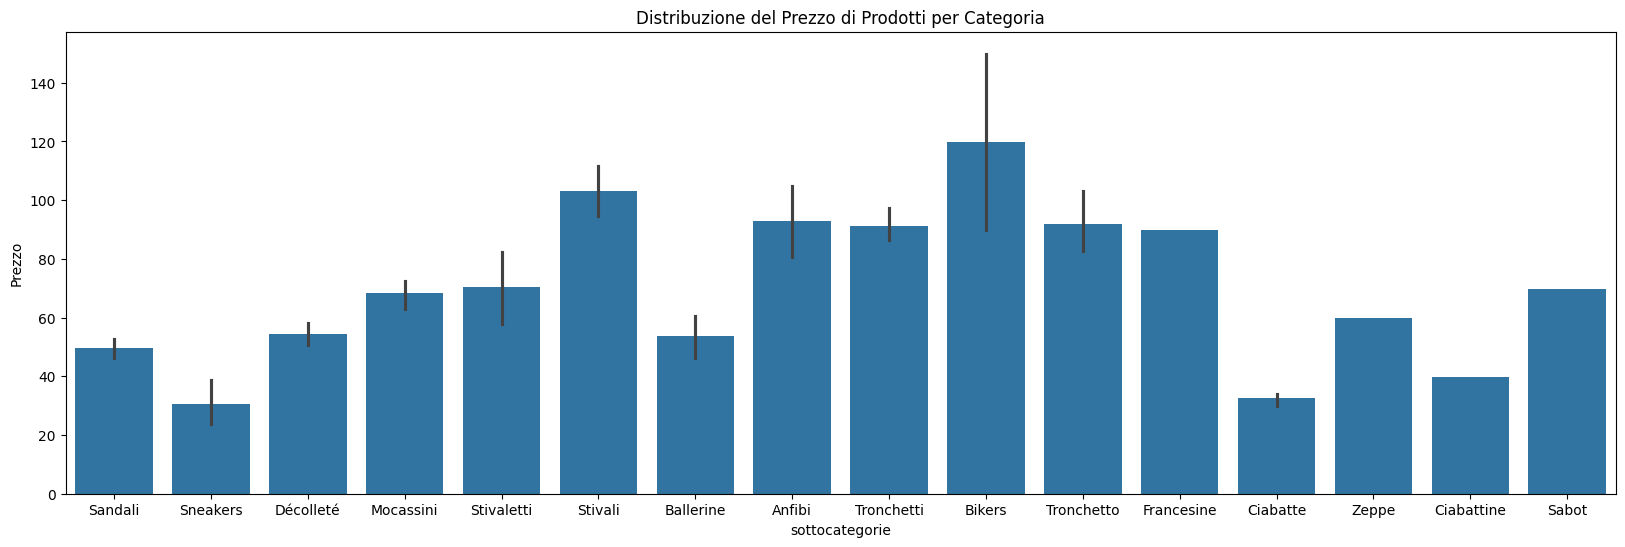

In [129]:
plt.figure(figsize=(20, 6))  
sns.barplot(x=DeCaro.sottocategorie,y=DeCaro.prezzo)
plt.ylabel('Prezzo')
plt.title('Distribuzione del Prezzo di Prodotti per Categoria')
plt.show()

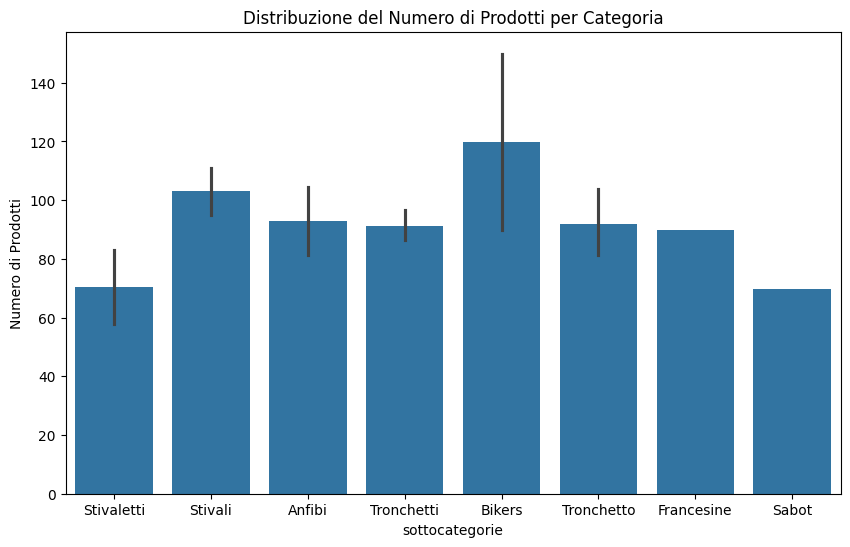

In [121]:
gruppo_stivaletti = DeCaro[DeCaro.categoria == "Stivali e stivaletti"]

plt.figure(figsize=(10, 6))  
sns.barplot(x=gruppo_stivaletti.sottocategorie,y=gruppo_stivaletti.prezzo)
plt.ylabel('Prezzo')
plt.title('Distribuzione del Prezzo di Prodotti per Categoria')
plt.show()

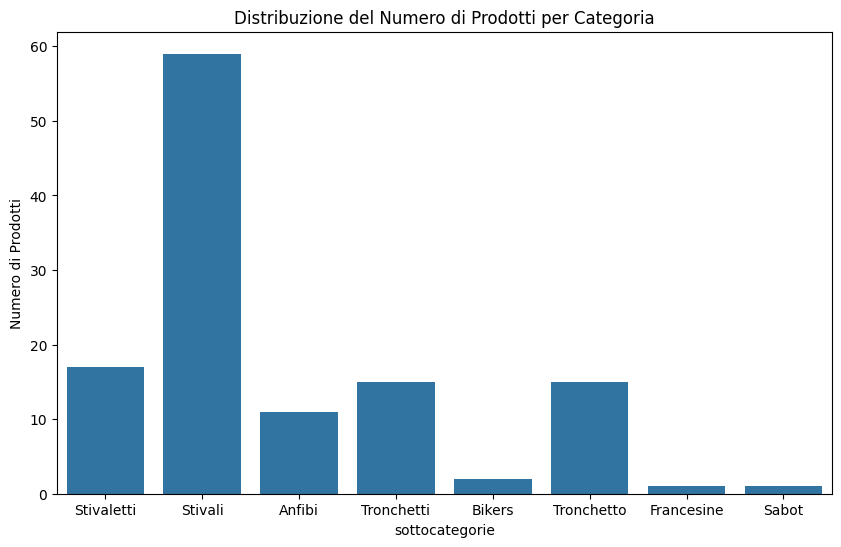

In [122]:
gruppo_stivaletti = DeCaro[DeCaro.categoria == "Stivali e stivaletti"]

gruppo_stivaletti.sottocategorie.value_counts()
plt.figure(figsize=(10, 6))  
sns.countplot(x=gruppo_stivaletti.sottocategorie)
plt.ylabel('Numero di Prodotti')
plt.title('Distribuzione del Numero di Prodotti per SottoCategoria')
plt.show()